This notebook covers using metrics to analyze the 'accuracy' of prophet models. In this notebook, we will extend the previous example (http://pythondata.com/forecasting-time-series-data-prophet-part-3/).

### Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

### Read in the data

Read the data in from the retail sales CSV file in the examples folder then set the index to the 'date' column. We are also parsing dates in the data file.

In [7]:
sales_df = pd.read_csv('../examples/retail_sales.csv', index_col='date', parse_dates=True)

In [8]:
sales_df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


### Prepare for Prophet

As explained in previous prophet posts, for prophet to work, we need to change the names of these columns to 'ds' and 'y'.

In [9]:
df = sales_df.reset_index()

In [10]:
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


Let's rename the columns as required by fbprophet. Additioinally, fbprophet doesn't like the index to be a datetime...it wants to see 'ds' as a non-index column, so we won't set an index differnetly than the integer index.

In [11]:
df=df.rename(columns={'date':'ds', 'sales':'y'})

In [12]:
df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


Now's a good time to take a look at your data.  Plot the data using pandas' ```plot``` function

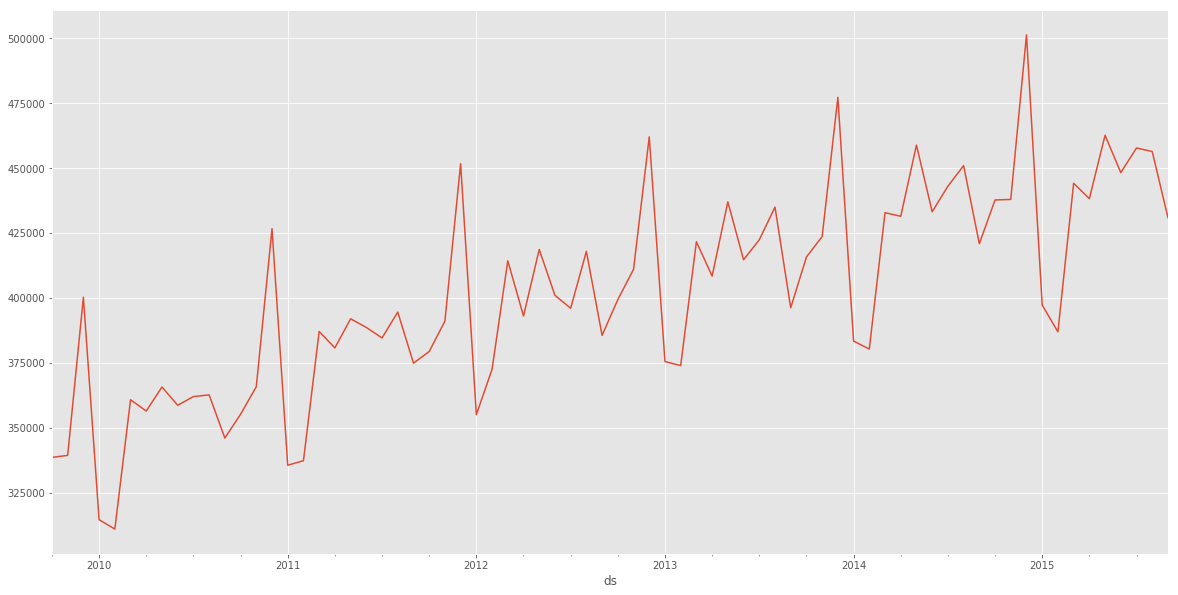

In [13]:
df.set_index('ds').y.plot()

### Running Prophet

Now, let's set prophet up to begin modeling our data using our ```promotions``` dataframe as part of the forecast

Note: Since we are using monthly data, you'll see a message from Prophet saying ```Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.```  This is OK since we are workign with monthly data but you can disable it by using ```weekly_seasonality=True``` in the instantiation of Prophet.

In [14]:
model = Prophet(weekly_seasonality=True)
model.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


We've instantiated the model, now we need to build some future dates to forecast into.

In [15]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


To forecast this future data, we need to run it through Prophet's model.

In [16]:
forecast = model.predict(future)

The resulting forecast dataframe contains quite a bit of data, but we really only care about a few columns.  First, let's look at the full dataframe:

In [17]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
91,2017-04-30,468082.409577,464956.699711,471147.685722,472486.198907,483381.833265,9937.139785,9937.139785,9937.139785,9937.139785,9937.139785,9937.139785,-6555.582971,-6555.582971,-6555.582971,16492.722756,16492.722756,16492.722756,478019.549362
92,2017-05-31,469057.099534,465662.801887,472373.303241,471468.813790,482178.571413,7870.343068,7870.343068,7870.343068,7870.343068,7870.343068,7870.343068,3144.688929,3144.688929,3144.688929,4725.654139,4725.654139,4725.654139,476927.442602
93,2017-06-30,470000.347880,466258.289786,473581.149637,470390.359168,481286.844354,5923.541507,5923.541507,5923.541507,5923.541507,5923.541507,5923.541507,1367.857376,1367.857376,1367.857376,4555.684131,4555.684131,4555.684131,475923.889387
94,2017-07-31,470975.037836,467044.252089,474840.391512,473868.420683,485725.749900,8920.871383,8920.871383,8920.871383,8920.871383,8920.871383,8920.871383,464.390253,464.390253,464.390253,8456.481130,8456.481130,8456.481130,479895.909220
95,2017-08-31,471949.727793,467690.449982,476067.455217,449757.838004,461753.391468,-16303.962389,-16303.962389,-16303.962389,-16303.962389,-16303.962389,-16303.962389,3066.479001,3066.479001,3066.479001,-19370.441390,-19370.441390,-19370.441390,455645.765404


We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [18]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,478019.549362,472486.198907,483381.833265
92,2017-05-31,476927.442602,471468.813790,482178.571413
93,2017-06-30,475923.889387,470390.359168,481286.844354
94,2017-07-31,479895.909220,473868.420683,485725.749900
95,2017-08-31,455645.765404,449757.838004,461753.391468


### Plotting Prophet results

Prophet has a plotting mechanism called ```plot```.  This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

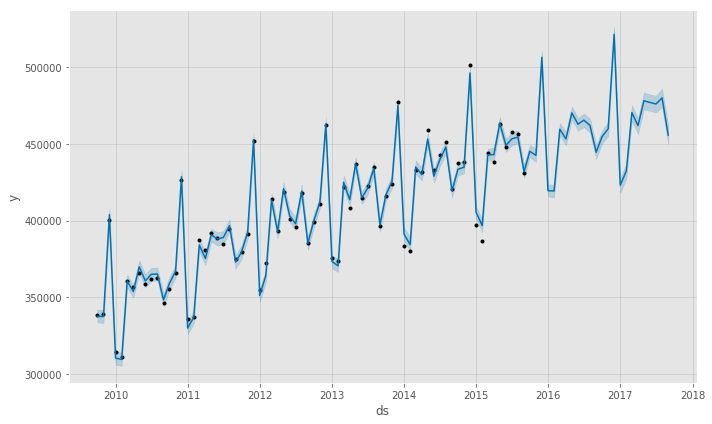

In [19]:
model.plot(forecast);

Personally, I'm not a fan of this visualization but I'm not going to build my own...you can see how I do that here:
https://github.com/urgedata/pythondata/blob/master/fbprophet/fbprophet_part_one.ipynb.

Additionally, prophet let's us take a at the components of our model, including the holidays. This component plot is an important plot as it lets you see the components of your model including the trend and seasonality (identified in the ```yearly``` pane).

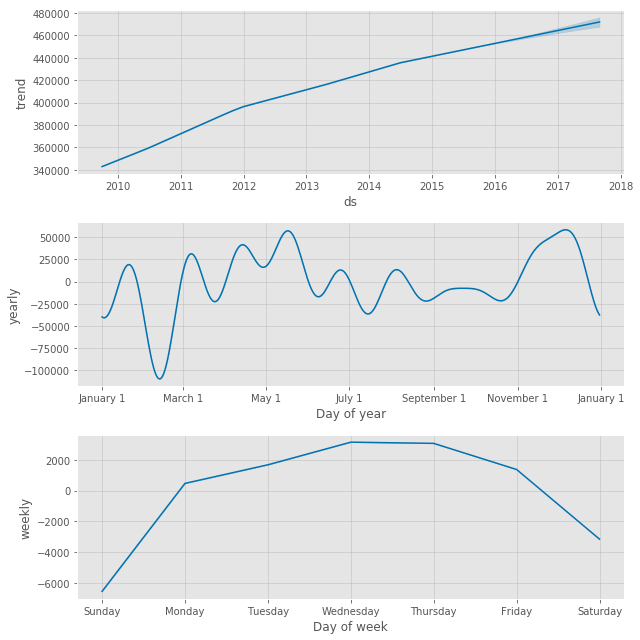

In [20]:
model.plot_components(forecast);

Now that we have our model, let's take a look at how it compares to our actual values using a few different metrics - R-Squared and Mean Squared Error (MSE).

To do this, we need to build a combined dataframe with yhat from the forecasts and the original 'y' values from the data.

In [21]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [22]:
metric_df.tail()

,ds,yhat,y
91,2017-04-30,478019.549362,NaN
92,2017-05-31,476927.442602,NaN
93,2017-06-30,475923.889387,NaN
94,2017-07-31,479895.909220,NaN
95,2017-08-31,455645.765404,NaN


You can see from the above, that the last part of the dataframe has "NaN" for 'y'...that's fine because we are only concerend about checking the forecast values versus the actual values so we can drop these "NaN" values. 

In [23]:
metric_df.dropna(inplace=True)

In [24]:
metric_df.tail()

,ds,yhat,y
67,2015-05-01,463373.701483,462615.0
68,2015-06-01,448934.210442,448229.0
69,2015-07-01,453231.199772,457710.0
70,2015-08-01,454359.024466,456340.0
71,2015-09-01,431765.115919,430917.0


Now let's take a look at our R-Squared value

In [25]:
r2_score(metric_df.y, metric_df.yhat)

0.99294587504221254

An r-squared value of 0.99 is amazing (and probably too good to be true, which tells me this data is most likely overfit).

In [26]:
mean_squared_error(metric_df.y, metric_df.yhat)

11129529.435500309

That's a large MSE value...and confirms my suspicion that this data is overfit and won't likely hold up well into the future. Remember...for MSE, closer to zero is better.

Now...let's see what the Mean Absolute Error (MAE) looks like.

In [27]:
mean_absolute_error(metric_df.y, metric_df.yhat)

2601.1470962189487

Not good. Not good at all. BUT...the purpose of this particular post is to show some usage of R-Squared, MAE and MSE's as metrics and I think we've done that.  

I can tell you from experience that part of the problem with this particular data is that its monthly and there aren't that many data points to start with (only 72 data points...not ideal for modeling).

# Another approach for metrics

While writing this post, I came across ML Metrics (https://github.com/benhamner/Metrics), which provides 17 metrics for Python (python version here --> https://github.com/benhamner/Metrics/tree/master/Python). 

Let's give it a go and see what these metrics show us.

In [28]:
import ml_metrics as metrics

In [29]:
metrics.mae(metric_df.y, metric_df.yhat)

2601.1470962189487

Same value for MAE as before...which is a good sign for this new metrics library. Let's take a look at a few more.

Here's the Absolute Error (pointwise...shows the error of each date's predicted value vs actual value)

In [30]:
metrics.ae(metric_df.y, metric_df.yhat)

array([  980.78652981,  1909.73431853,  3558.12066827,  4205.20676176,
        1465.38363624,   247.29814884,  2623.23618157,  4111.88668014,
        2009.72585079,  2940.10559527,  2507.39899627,  2294.1097823 ,
        3848.36099631,  1168.84626695,  1875.54056421,  5624.28759749,
         417.82061098,  2992.28230731,  5450.88629556,  1253.42493476,
         614.53806892,  4365.16511309,  2087.98815203,  1944.8094517 ,
          84.57305492,  1131.73955625,  1049.4680648 ,  3823.08228724,
        8499.68986493,   958.57655771,   329.3221649 ,  2131.60074829,
        2047.20026104,  1924.99877484,  1260.94050473,   467.53488778,
         433.01390375,  1071.19601558,   802.94020855,  2175.68546184,
        3409.11488108,  3343.49677485,  5207.98095069,    26.30765192,
          90.36905745,  1267.6986595 ,   877.88749072,   796.99492431,
         939.52926762,  1707.37509234,  2181.63630771,  7738.051735  ,
        4036.69530391,  2104.86669202,  1511.36345802,  5797.92942885,
      

Let's look at Root Mean Square Error

In [31]:
metrics.rmse(metric_df.y, metric_df.yhat)

3336.0949380226439

This new metrics library looks interesting...I'll keep in in my toolbox for future use. 

Hopefully this was useful for you to see how to look at some useful metrics for analyzing how good/bad your models are.  These approaches can be used for most other modeling techniques other than facebook prophet.